In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 4000  # 列数
alpha = 0.5  # 圧縮率
M = int(alpha*N)  # 行数
rho = 0.2  # 非零成分の割合

In [4]:
SNRs = [float('inf'), 60, 50, 40, 30]  # 信号対雑音比
kappa = 5  # 条件数
P = 5  # ノード数
T = 30  # 反復回数
sim = 100  # 実験数

In [5]:
x = [bernouli_gaussian(N, rho) for _ in range(sim)]
lsnr = len(SNRs)
color = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple']

# i.i.d.ガウス行列での信号再構成

In [6]:
MSE_iidG_oamp = np.empty((sim, lsnr, T+1))

MSE_iidG_doamp = np.empty((sim, lsnr, T+1))
CommCost_iidG_doamp = np.empty((sim, lsnr, T))

In [7]:
for i in tqdm(range(sim)):
    iidG = iidGaussian(M, N, m=0, v=1/M)

    oamp = [D_OAMP(iidG.A, x[i], SNR, 1) for SNR in SNRs]
    doamp = [D_OAMP(iidG.A, x[i], SNR, P) for SNR in SNRs]

    for j in range(lsnr):
        oamp[j].estimate(T)
        MSE_iidG_oamp[i, j] = oamp[j].mse
        
        doamp[j].estimate(T)
        MSE_iidG_doamp[i, j] = doamp[j].mse
        CommCost_iidG_doamp[i, j] = doamp[j].communication_cost

100%|██████████| 100/100 [16:04:06<00:00, 578.46s/it]


In [8]:
MSE_iidG_oamp_mean = np.empty((lsnr, T+1))
CommCost_iidG_oamp_mean = np.empty((lsnr, T))

MSE_iidG_doamp_mean = np.empty((lsnr, T+1))
CommCost_iidG_doamp_mean = np.empty((lsnr, T))

for i in range(lsnr):
    MSE_iidG_oamp_mean[i] = np.mean(MSE_iidG_oamp[:, i], axis=0)

    MSE_iidG_doamp_mean[i] = np.mean(MSE_iidG_doamp[:, i], axis=0)
    CommCost_iidG_doamp_mean[i] = np.mean(CommCost_iidG_doamp[:, i], axis=0)

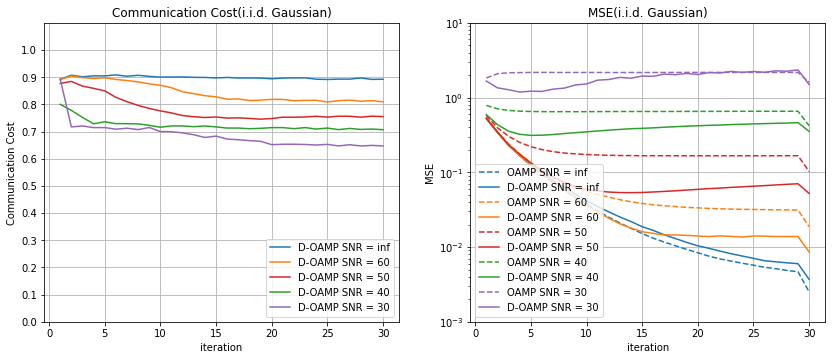

In [9]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
for i in range(lsnr):
	plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, N, P, color[i])

plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
for i in range(lsnr):
	plt_MSE(MSE_iidG_oamp_mean[i], 'OAMP SNR = '+str(SNRs[i]), T, color[i], '--')
	plt_MSE(MSE_iidG_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, color[i])
plt.legend(loc="lower left")
plt.grid()

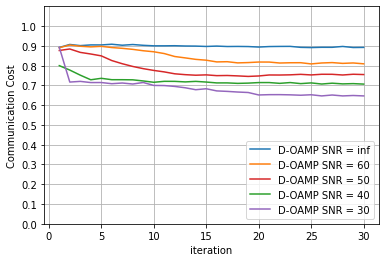

In [10]:
for i in range(lsnr):
	plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, N, P, color[i])

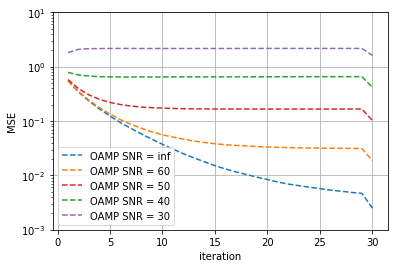

In [11]:
for i in range(lsnr):
	plt_MSE(MSE_iidG_oamp_mean[i], 'OAMP SNR = '+str(SNRs[i]), T, color[i], '--')
plt.legend(loc="lower left")

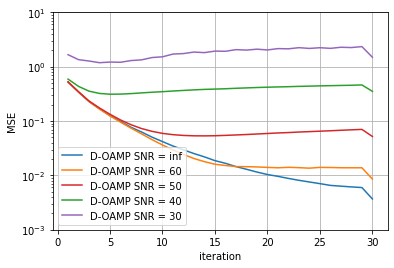

In [12]:
for i in range(lsnr):
	plt_MSE(MSE_iidG_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, color[i])
plt.legend(loc="lower left")

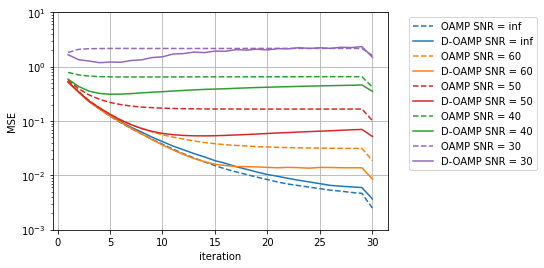

In [13]:
for i in range(lsnr):
	plt_MSE(MSE_iidG_oamp_mean[i], 'OAMP SNR = '+str(SNRs[i]), T, color[i], '--')
	plt_MSE(MSE_iidG_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, color[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

# ユニタリ不変行列での信号再構成

In [16]:
MSE_UniInv_oamp = np.empty((sim, lsnr, T+1))

MSE_UniInv_doamp = np.empty((sim, lsnr, T+1))
CommCost_UniInv_doamp = np.empty((sim, lsnr, T))

In [17]:
for i in tqdm(range(sim)):
    UniInv = UniInvar(M, N, kappa)

    oamp = [D_OAMP(UniInv.A, x[i], SNR, 1) for SNR in SNRs]
    doamp = [D_OAMP(UniInv.A, x[i], SNR, P) for SNR in SNRs]

    for j in range(lsnr):
        oamp[j].estimate(T)
        MSE_UniInv_oamp[i, j] = oamp[j].mse
        
        doamp[j].estimate(T)
        MSE_UniInv_doamp[i, j] = doamp[j].mse
        CommCost_UniInv_doamp[i, j] = doamp[j].communication_cost

100%|██████████| 100/100 [25:39:26<00:00, 923.67s/it]


In [18]:
MSE_UniInv_oamp_mean = np.empty((lsnr, T+1))

MSE_UniInv_doamp_mean = np.empty((lsnr, T+1))
CommCost_UniInv_doamp_mean = np.empty((lsnr, T))

for i in range(lsnr):
    MSE_UniInv_oamp_mean[i] = np.mean(MSE_UniInv_oamp[:, i], axis=0)

    MSE_UniInv_doamp_mean[i] = np.mean(MSE_UniInv_doamp[:, i], axis=0)
    CommCost_UniInv_doamp_mean[i] = np.mean(CommCost_UniInv_doamp[:, i], axis=0)

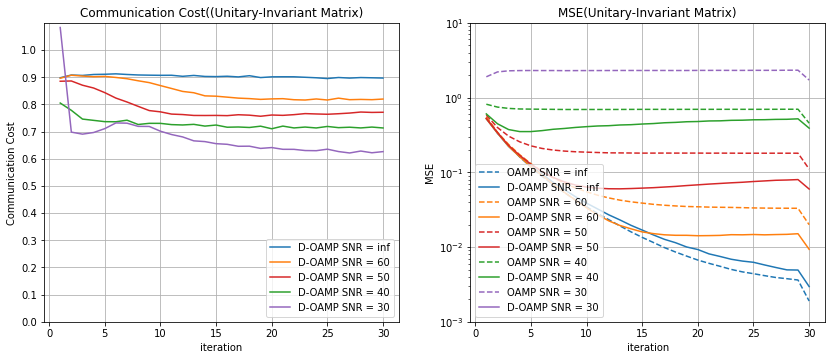

In [19]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost((Unitary-Invariant Matrix)')
for i in range(lsnr):
	plt_CC(CommCost_UniInv_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, N, P, color[i])


plt.subplot(122)
plt.title('MSE(Unitary-Invariant Matrix)')
for i in range(lsnr):
	plt_MSE(MSE_UniInv_oamp_mean[i], 'OAMP SNR = '+str(SNRs[i]), T, color[i], '--')
	plt_MSE(MSE_UniInv_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, color[i])
plt.legend(loc="lower left")
plt.grid()

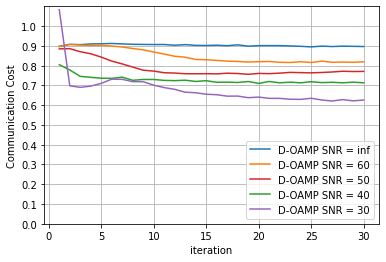

In [20]:
for i in range(lsnr):
	plt_CC(CommCost_UniInv_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, N, P, color[i])

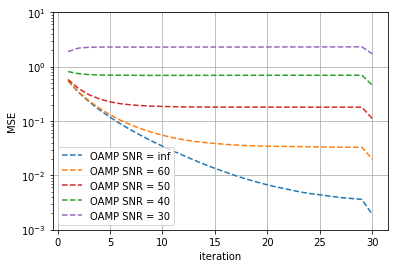

In [21]:
for i in range(lsnr):
	plt_MSE(MSE_UniInv_oamp_mean[i], 'OAMP SNR = '+str(SNRs[i]), T, color[i], '--')
plt.legend(loc="lower left")

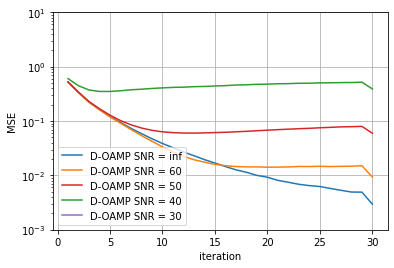

In [22]:
for i in range(lsnr):
	plt_MSE(MSE_UniInv_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, color[i])
plt.legend(loc="lower left")

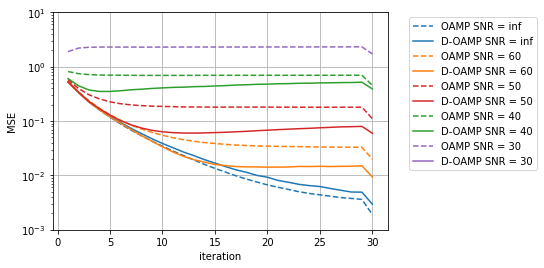

In [23]:
for i in range(lsnr):
	plt_MSE(MSE_UniInv_oamp_mean[i], 'OAMP SNR = '+str(SNRs[i]), T, color[i], '--')
	plt_MSE(MSE_UniInv_doamp_mean[i], 'D-OAMP SNR = '+str(SNRs[i]), T, color[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()